In [1]:
import os
import torch
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch_geometric as pyg
from torch_geometric.data import Data
from torch_geometric.utils import degree

In [2]:
import wandb
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: emirceyani (fedgraphlearn). Use `wandb login --relogin` to force relogin


True

In [3]:
datapath = "../../../datasets/"

In [4]:
run = 1
wandb.init( project = 'fedgdrop',
        name=f'degree-dist-vis-v{run}' 
    )

In [5]:
datapath = "../../../datasets/"

In [6]:
def torch_load(base_dir, filename):
    fpath = os.path.join(base_dir, filename)    
    return torch.load(fpath, map_location=torch.device('cpu'))

def get_degree_list(x):
    return degree(index = x.edge_index[0], num_nodes =  x.num_nodes).tolist()

In [7]:
def wandb_save_boxplot(x, n_clients, dset, title , key):
    fig, ax = plt.subplots()

    ax.boxplot(x.values(), vert = False)
    for client_id in range(n_clients):
        ds = f'{client_id}-{dset}'
        
        ax.scatter(x = x[ds], y=np.random.normal(loc = client_id+1, scale= 0.15, size = len(x[ds])))    
    ax.set_title(title)
    wandb.log({key : wandb.Image(plt)})

## Cora Dataset

### Degree Distribution over Clients via Boxplots
#### 5 Clients

In [8]:
n_clients = 5
degree_dict_tr_cora5, degree_dict_val_cora5, degree_dict_tst_cora5 =  {}, {}, {}

In [9]:
for client_id in range(n_clients):
        ds = f'{client_id}-Cora'
        partition = torch_load(datapath, f'Cora_disjoint/{n_clients}/partition_{client_id}.pt')
        #Data objects
        tr, val, tst = partition['client_tr'], partition['client_val'] , partition['client_tst']
        degree_dict_tr_cora5[ds] = get_degree_list(tr)
        degree_dict_val_cora5[ds] = get_degree_list(val)
        degree_dict_tst_cora5[ds] = get_degree_list(tst)


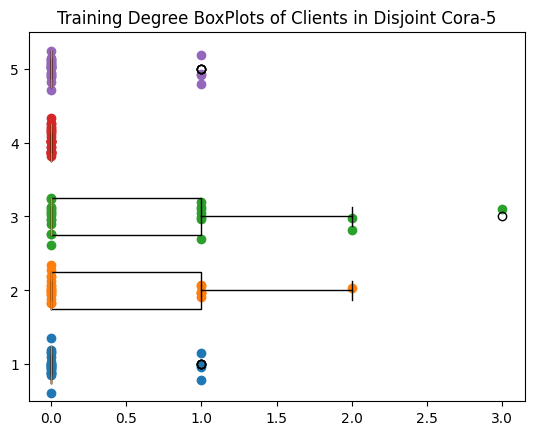

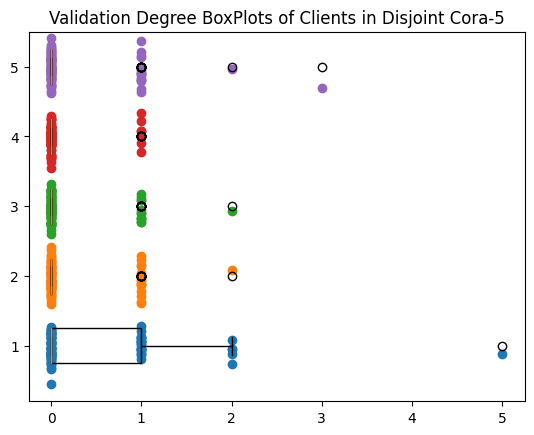

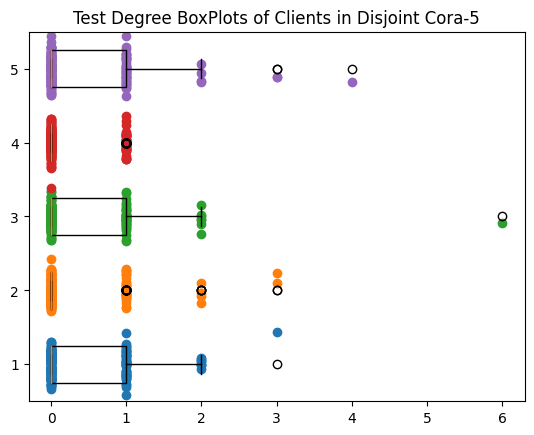

In [10]:
t1 = 'Training Degree BoxPlots of Clients in Disjoint Cora-5'
t2 = 'Validation Degree BoxPlots of Clients in Disjoint Cora-5'
t3 = 'Test Degree BoxPlots of Clients in Disjoint Cora-5'
wandb_save_boxplot(degree_dict_tr_cora5, n_clients, 'Cora', t1 , 'cora5-tr-degree-boxplot')
wandb_save_boxplot(degree_dict_val_cora5, n_clients, 'Cora', t2 , 'cora5-val-degree-boxplot')
wandb_save_boxplot(degree_dict_tst_cora5, n_clients, 'Cora', t3 , 'cora5-tst-degree-boxplot')

In [11]:
n_clients = 10
degree_dict_tr_cora10, degree_dict_val_cora10, degree_dict_tst_cora10  =  {}, {}, {}

In [12]:
for client_id in range(n_clients):
        ds = f'{client_id}-Cora'
        partition = torch_load(datapath, f'Cora_disjoint/{n_clients}/partition_{client_id}.pt')
        #Data objects
        tr, val, tst = partition['client_tr'], partition['client_val'] , partition['client_tst']
        degree_dict_tr_cora10[ds] = get_degree_list(tr)
        degree_dict_val_cora10[ds] = get_degree_list(val)
        degree_dict_tst_cora10[ds] = get_degree_list(tst)

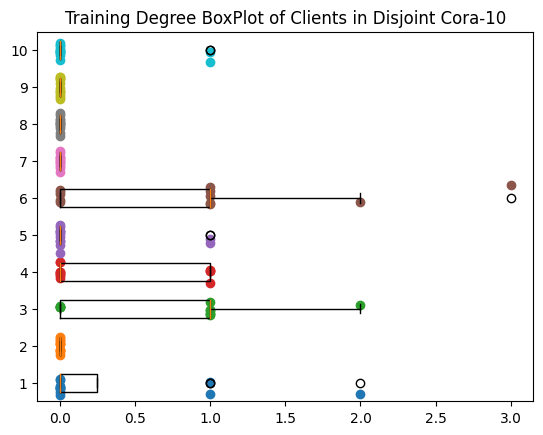

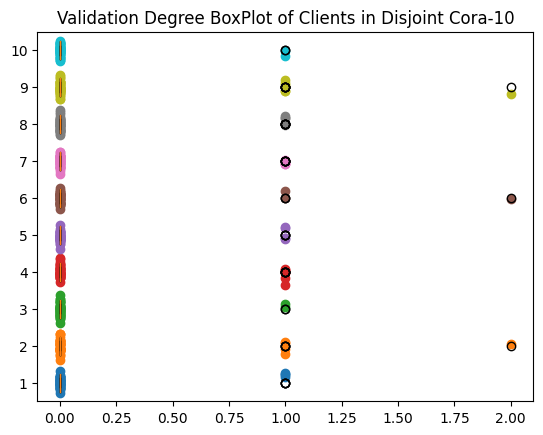

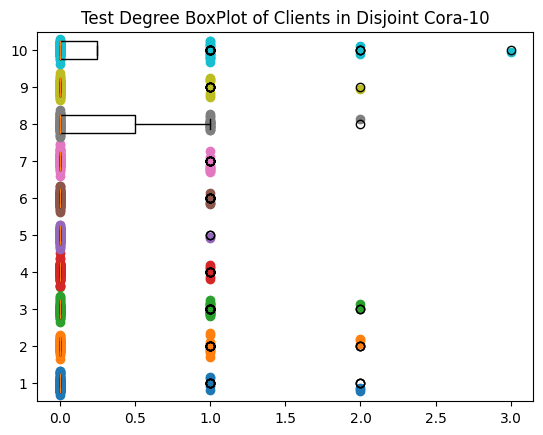

In [13]:
t1 = 'Training Degree BoxPlot of Clients in Disjoint Cora-10'
t2 = 'Validation Degree BoxPlot of Clients in Disjoint Cora-10'
t3 = 'Test Degree BoxPlot of Clients in Disjoint Cora-10'
wandb_save_boxplot(degree_dict_tr_cora10, n_clients, 'Cora', t1 , 'cora10-tr-degree-boxplot')
wandb_save_boxplot(degree_dict_val_cora10, n_clients, 'Cora', t2 , 'cora10-val-degree-boxplot')
wandb_save_boxplot(degree_dict_tst_cora10, n_clients, 'Cora', t3 , 'cora10-tst-degree-boxplot')

In [14]:
n_clients = 20
degree_dict_tr_cora20, degree_dict_val_cora20, degree_dict_tst_cora20 =  {}, {}, {}

In [15]:
for client_id in range(n_clients):
        ds = f'{client_id}-Cora'
        partition = torch_load(datapath, f'Cora_disjoint/{n_clients}/partition_{client_id}.pt')
        #Data objects
        tr, val, tst = partition['client_tr'], partition['client_val'] , partition['client_tst']
        degree_dict_tr_cora20[ds] = get_degree_list(tr)
        degree_dict_val_cora20[ds] = get_degree_list(val)
        degree_dict_tst_cora20[ds] = get_degree_list(tst)

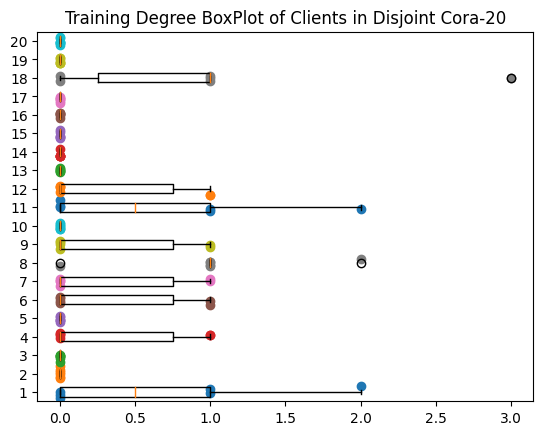

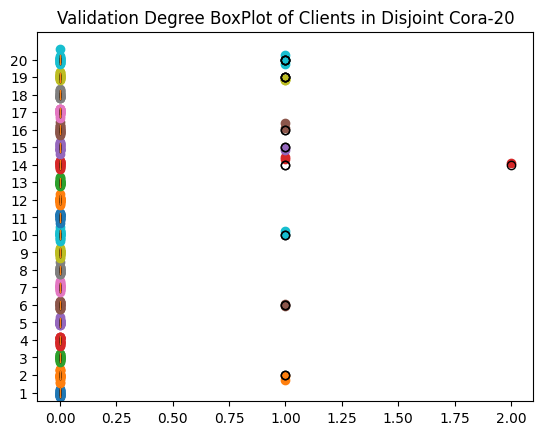

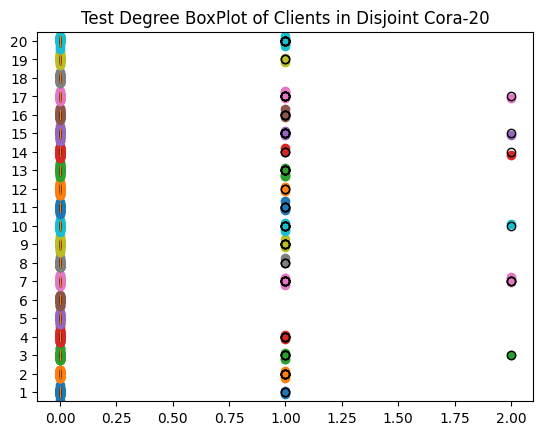

In [16]:
t1 = 'Training Degree BoxPlot of Clients in Disjoint Cora-20'
t2 = 'Validation Degree BoxPlot of Clients in Disjoint Cora-20'
t3 = 'Test Degree BoxPlot of Clients in Disjoint Cora-20'
wandb_save_boxplot(degree_dict_tr_cora20, n_clients, 'Cora', t1 , 'cora20-tr-degree-boxplot')
wandb_save_boxplot(degree_dict_val_cora20, n_clients, 'Cora', t2 , 'cora20-val-degree-boxplot')
wandb_save_boxplot(degree_dict_tst_cora20, n_clients, 'Cora', t3 , 'cora20-tst-degree-boxplot')

## CiteSeer Dataset


In [17]:
n_clients = 5
degree_dict_tr_seer5, degree_dict_val_seer5, degree_dict_tst_seer5 =  {}, {}, {}

In [18]:
for client_id in range(n_clients):
        ds = f'{client_id}-CiteSeer'
        partition = torch_load(datapath, f'CiteSeer_disjoint/{n_clients}/partition_{client_id}.pt')
        #Data objects
        tr, val, tst = partition['client_tr'], partition['client_val'] , partition['client_tst']
        degree_dict_tr_seer5[ds] = get_degree_list(tr)
        degree_dict_val_seer5[ds] = get_degree_list(val)
        degree_dict_tst_seer5[ds] = get_degree_list(tst)

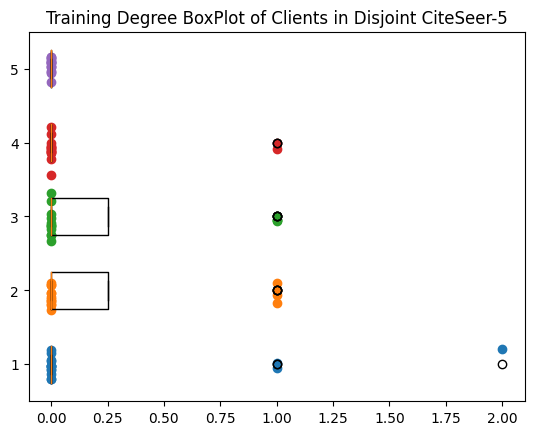

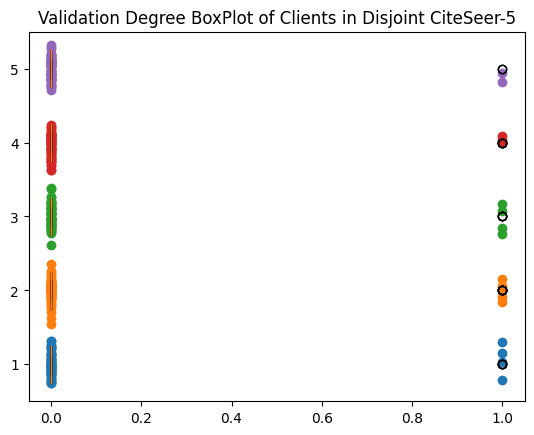

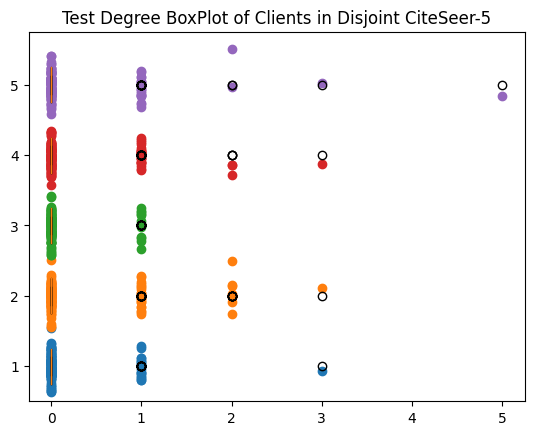

In [19]:
t1 = 'Training Degree BoxPlot of Clients in Disjoint CiteSeer-5'
t2 = 'Validation Degree BoxPlot of Clients in Disjoint CiteSeer-5'
t3 = 'Test Degree BoxPlot of Clients in Disjoint CiteSeer-5'
wandb_save_boxplot(degree_dict_tr_seer5, n_clients, 'CiteSeer', t1 , 'seer5-tr-degree-boxplot')
wandb_save_boxplot(degree_dict_val_seer5, n_clients, 'CiteSeer', t2 , 'seer5-val-degree-boxplot')
wandb_save_boxplot(degree_dict_tst_seer5, n_clients, 'CiteSeer', t3 , 'seer5-tst-degree-boxplot')

In [20]:
n_clients = 10
degree_dict_tr_seer10, degree_dict_val_seer10, degree_dict_tst_seer10 =  {}, {}, {}

In [21]:
for client_id in range(n_clients):
        ds = f'{client_id}-CiteSeer'
        partition = torch_load(datapath, f'CiteSeer_disjoint/{n_clients}/partition_{client_id}.pt')
        #Data objects
        tr, val, tst = partition['client_tr'], partition['client_val'] , partition['client_tst']
        degree_dict_tr_seer10[ds] = get_degree_list(tr)
        degree_dict_val_seer10[ds] = get_degree_list(val)
        degree_dict_tst_seer10[ds] = get_degree_list(tst)

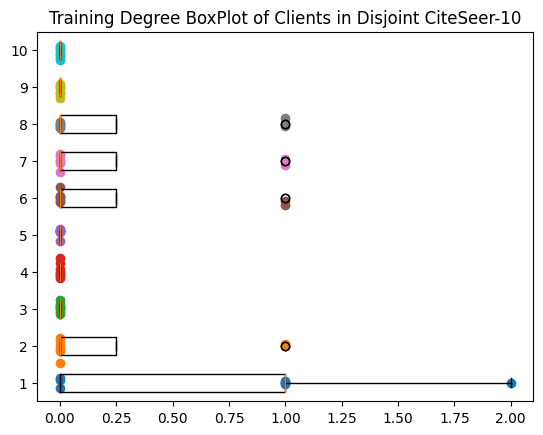

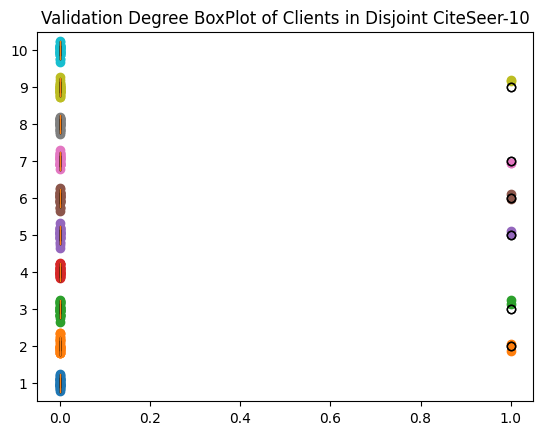

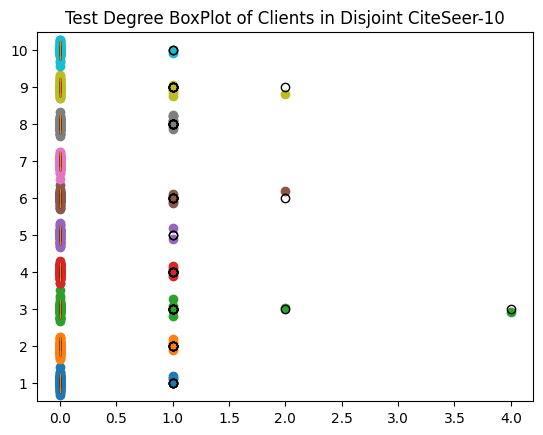

In [22]:
t1 = 'Training Degree BoxPlot of Clients in Disjoint CiteSeer-10'
t2 = 'Validation Degree BoxPlot of Clients in Disjoint CiteSeer-10'
t3 = 'Test Degree BoxPlot of Clients in Disjoint CiteSeer-10'
wandb_save_boxplot(degree_dict_tr_seer10, n_clients, 'CiteSeer', t1 , 'seer10-tr-degree-boxplot')
wandb_save_boxplot(degree_dict_val_seer10, n_clients, 'CiteSeer', t2 , 'seer10-val-degree-boxplot')
wandb_save_boxplot(degree_dict_tst_seer10, n_clients, 'CiteSeer', t3 , 'seer10-tst-degree-boxplot')

In [23]:
n_clients = 20
degree_dict_tr_seer20, degree_dict_val_seer20, degree_dict_tst_seer20 =  {}, {}, {}

In [24]:
for client_id in range(n_clients):
        ds = f'{client_id}-CiteSeer'
        partition = torch_load(datapath, f'CiteSeer_disjoint/{n_clients}/partition_{client_id}.pt')
        #Data objects
        tr, val, tst = partition['client_tr'], partition['client_val'] , partition['client_tst']
        degree_dict_tr_seer20[ds] = get_degree_list(tr)
        degree_dict_val_seer20[ds] = get_degree_list(val)
        degree_dict_tst_seer20[ds] = get_degree_list(tst)

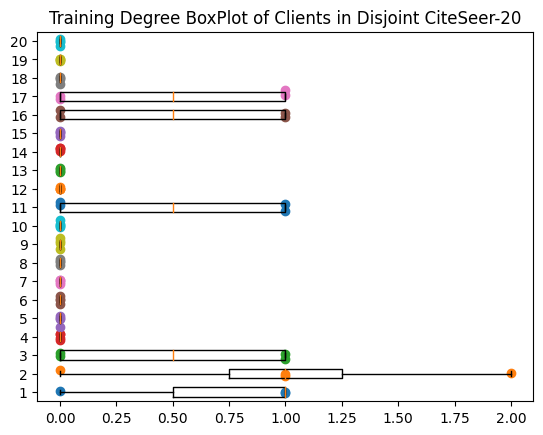

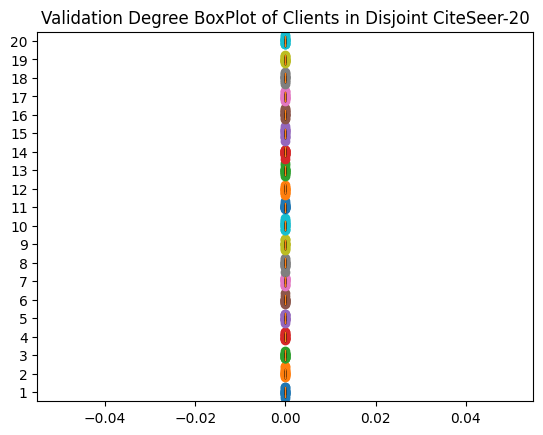

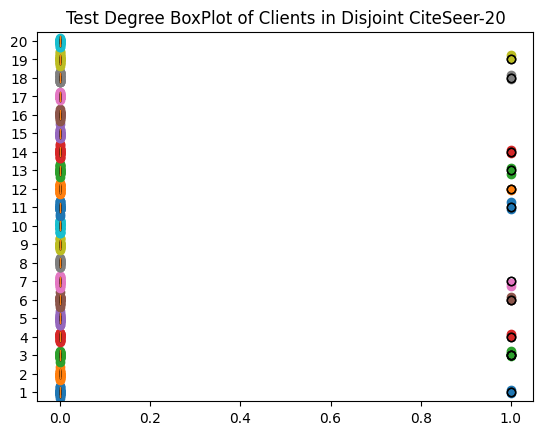

In [25]:
t1 = 'Training Degree BoxPlot of Clients in Disjoint CiteSeer-20'
t2 = 'Validation Degree BoxPlot of Clients in Disjoint CiteSeer-20'
t3 = 'Test Degree BoxPlot of Clients in Disjoint CiteSeer-20'
wandb_save_boxplot(degree_dict_tr_seer20, n_clients, 'CiteSeer', t1 , 'seer20-tr-degree-boxplot')
wandb_save_boxplot(degree_dict_val_seer20, n_clients, 'CiteSeer', t2 , 'seer20-val-degree-boxplot')
wandb_save_boxplot(degree_dict_tst_seer20, n_clients, 'CiteSeer', t3 , 'seer20-tst-degree-boxplot')

## PubMed Dataset

In [34]:
n_clients = 5
degree_dict_tr_med5, degree_dict_val_med5, degree_dict_tst_med5 =  {}, {}, {}

In [35]:
for client_id in range(n_clients):
        ds = f'{client_id}-PubMed'
        partition = torch_load(datapath, f'PubMed_disjoint/{n_clients}/partition_{client_id}.pt')
        #Data objects
        tr, val, tst = partition['client_tr'], partition['client_val'] , partition['client_tst']
        degree_dict_tr_med5[ds] = get_degree_list(tr)
        degree_dict_val_med5[ds] = get_degree_list(val)
        degree_dict_tst_med5[ds] = get_degree_list(tst)

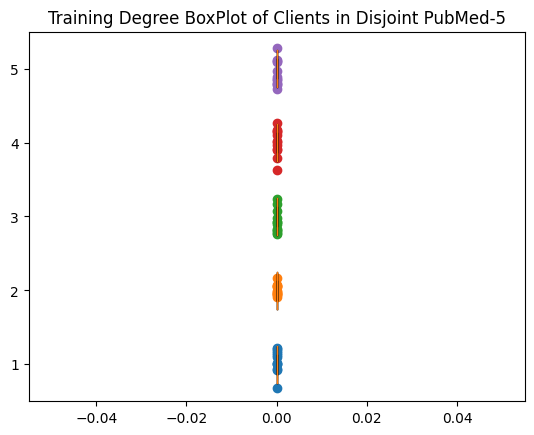

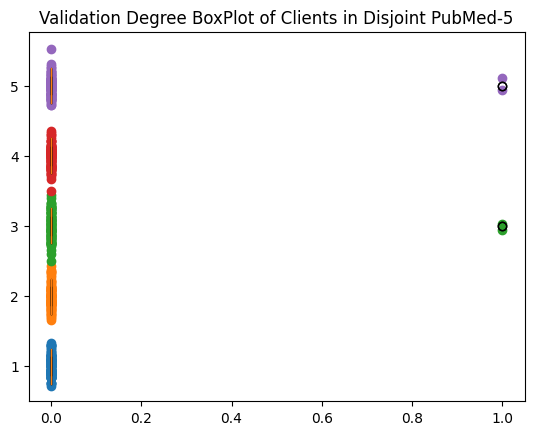

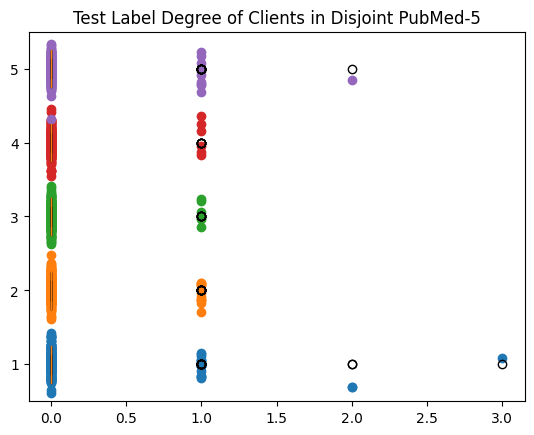

In [36]:
t1 = 'Training Degree BoxPlot of Clients in Disjoint PubMed-5'
t2 = 'Validation Degree BoxPlot of Clients in Disjoint PubMed-5'
t3 = 'Test Label Degree of Clients in Disjoint PubMed-5'
wandb_save_boxplot(degree_dict_tr_med5, n_clients, 'PubMed', t1 , 'med5-tr-degree-boxplot')
wandb_save_boxplot(degree_dict_val_med5, n_clients, 'PubMed', t2 , 'med5-val-degree-boxplot')
wandb_save_boxplot(degree_dict_tst_med5, n_clients, 'PubMed', t3 , 'med5-tst-degree-boxplot')

In [39]:
n_clients = 10
degree_dict_tr_med10, degree_dict_val_med10, degree_dict_tst_med10 =  {}, {}, {}

In [40]:
for client_id in range(n_clients):
        ds = f'{client_id}-PubMed'
        partition = torch_load(datapath, f'PubMed_disjoint/{n_clients}/partition_{client_id}.pt')
        #Data objects
        tr, val, tst = partition['client_tr'], partition['client_val'] , partition['client_tst']
        degree_dict_tr_med10[ds] = get_degree_list(tr)
        degree_dict_val_med10[ds] = get_degree_list(val)
        degree_dict_tst_med10[ds] = get_degree_list(tst)

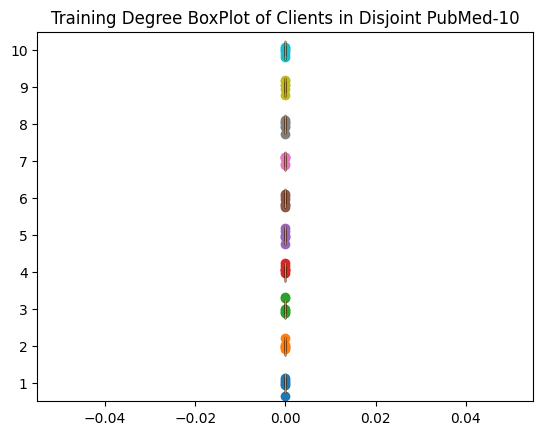

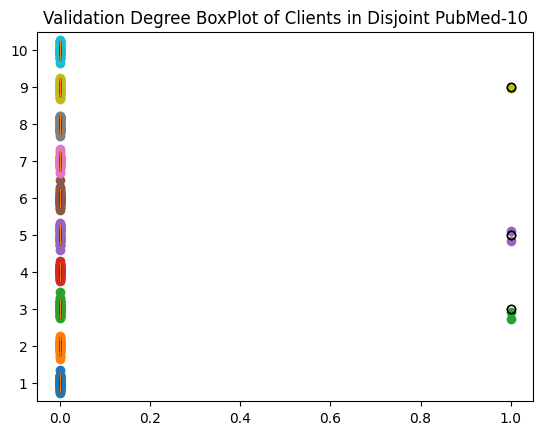

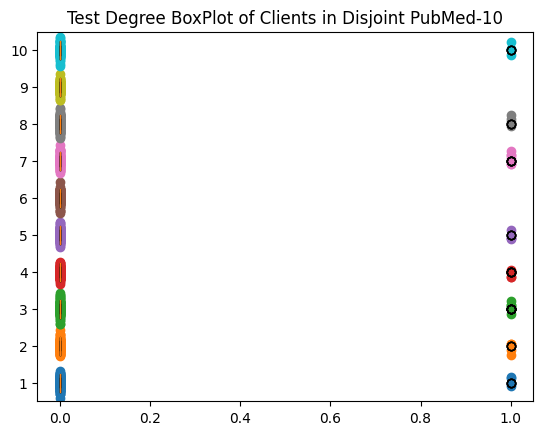

In [41]:
t1 = 'Training Degree BoxPlot of Clients in Disjoint PubMed-10'
t2 = 'Validation Degree BoxPlot of Clients in Disjoint PubMed-10'
t3 = 'Test Degree BoxPlot of Clients in Disjoint PubMed-10'
wandb_save_boxplot(degree_dict_tr_med10, n_clients, 'PubMed', t1 , 'med10-tr-degree-boxplot')
wandb_save_boxplot(degree_dict_val_med10, n_clients, 'PubMed', t2 , 'med10-val-degree-boxplot')
wandb_save_boxplot(degree_dict_tst_med10, n_clients, 'PubMed', t3 , 'med10-tst-degree-boxplot')

In [44]:
n_clients = 20
degree_dict_tr_med20, degree_dict_val_med20, degree_dict_tst_med20 =  {}, {}, {}

In [45]:
for client_id in range(n_clients):
        ds = f'{client_id}-PubMed'
        partition = torch_load(datapath, f'PubMed_disjoint/{n_clients}/partition_{client_id}.pt')
        #Data objects
        tr, val, tst = partition['client_tr'], partition['client_val'] , partition['client_tst']
        degree_dict_tr_med20[ds] = get_degree_list(tr)
        degree_dict_val_med20[ds] = get_degree_list(val)
        degree_dict_tst_med20[ds] = get_degree_list(tst)

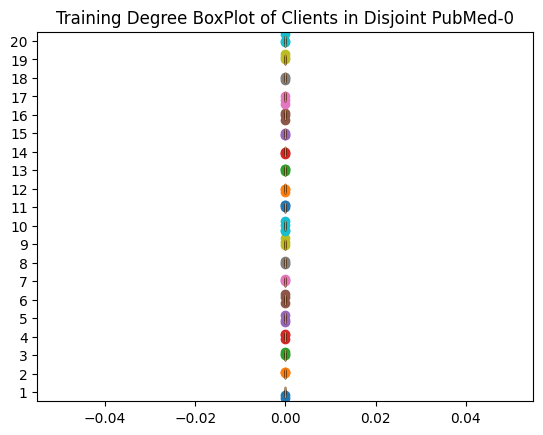

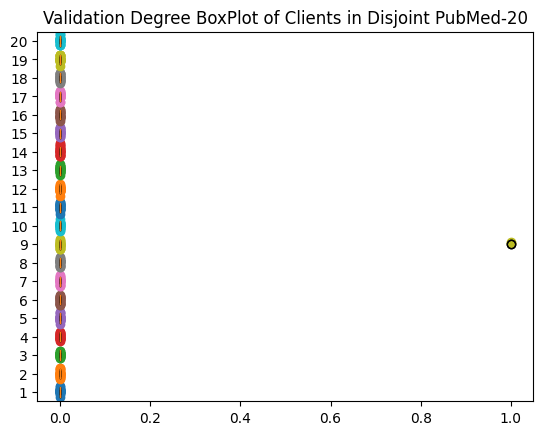

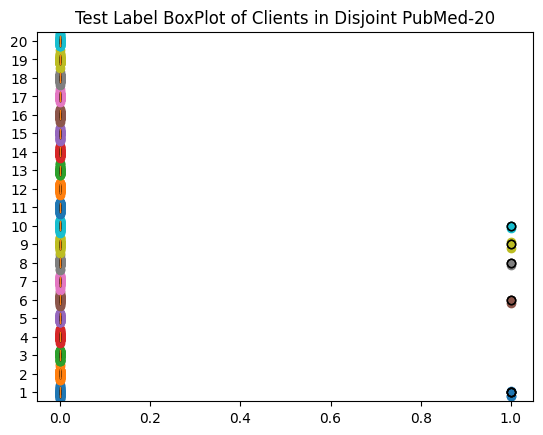

In [46]:
t1 = 'Training Degree BoxPlot of Clients in Disjoint PubMed-0'
t2 = 'Validation Degree BoxPlot of Clients in Disjoint PubMed-20'
t3 = 'Test Label BoxPlot of Clients in Disjoint PubMed-20'
wandb_save_boxplot(degree_dict_tr_med20, n_clients, 'PubMed', t1 , 'med20-tr-degree-boxplot')
wandb_save_boxplot(degree_dict_val_med20, n_clients, 'PubMed', t2 , 'med20-val-degree-boxplot')
wandb_save_boxplot(degree_dict_tst_med20, n_clients, 'PubMed', t3 , 'med20-tst-degree-boxplot')

In [35]:
wandb.finish()

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job
